# 파이토치 CIFAR10 모델
- 코드 출처: https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

## modules import

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

- 현재 GPU 설정

In [4]:
torch.cuda.is_available()

True

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

## 전처리 설정

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

## 데이터 로드 및 확인

In [8]:
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True, transform = transform, download = False)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transform, download = False)

In [10]:
train_dataloader = DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)
test_dataloader = DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

In [11]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

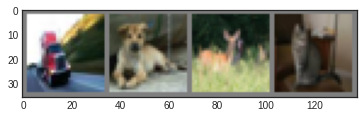

truck	 dog	 deer	 cat	


In [21]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('{}\t'.format(classes[labels[j]]) for j in range(4)))

## 신경망 구성

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()
net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 손실함수와 옵티마이저

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

## 모델 학습

- 설명을 위해 `epochs=2`로 지정

In [32]:
for epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print("Epoch:{}, Batch:{}, Loss:{}".format(epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0

 ** On entry to SGEMM  parameter number 10 had an illegal value
 ** On entry to SGEMM  parameter number 10 had an illegal value
Epoch:1, Batch:2000, Loss:2.1633198776245117
Epoch:1, Batch:4000, Loss:1.7894104147553445
Epoch:1, Batch:6000, Loss:1.629186591476202
Epoch:1, Batch:8000, Loss:1.5333173372894526
Epoch:1, Batch:10000, Loss:1.5085935540869833
Epoch:1, Batch:12000, Loss:1.4556674984395503
Epoch:2, Batch:2000, Loss:1.3856982425898314
Epoch:2, Batch:4000, Loss:1.3754839224368334
Epoch:2, Batch:6000, Loss:1.3330759754106403
Epoch:2, Batch:8000, Loss:1.3142254059910774
Epoch:2, Batch:10000, Loss:1.2798697220310569
Epoch:2, Batch:12000, Loss:1.2794955782108008


In [33]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-9.4570e-02, -1.6746e-01, -1.7186e-01,  4.9412e-02,  3.8453e-02],
                        [-2.7800e-02, -2.1084e-01, -3.9834e-01, -2.8258e-01, -2.5092e-01],
                        [ 5.2874e-02,  1.3338e-01, -5.0822e-02, -1.3327e-01, -1.1532e-01],
                        [ 1.4363e-01,  1.6729e-01,  2.3719e-01,  7.5864e-02,  4.2501e-02],
                        [ 7.2977e-02,  2.9978e-01,  3.2860e-01,  2.7876e-01,  2.3318e-01]],
              
                       [[ 7.0887e-02, -1.0175e-01,  5.4276e-02,  6.6603e-02,  3.6593e-01],
                        [-7.5634e-02, -2.3375e-01, -3.5219e-01, -1.4352e-01, -1.2634e-01],
                        [ 5.4360e-02,  1.1761e-04,  1.1501e-02, -1.7742e-01, -6.9884e-02],
                        [-7.3966e-04,  4.1124e-02,  1.0678e-01,  5.6756e-02, -5.2330e-02],
                        [ 2.1965e-02, -3.2599e-02,  1.6012e-02,  5.9247e-02, -6.2115e-02]],
              
                       [[ 2.

## 모델의 저장 및 로드

In [34]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

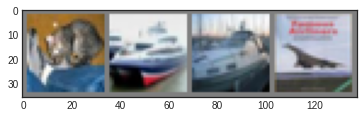

	cat 	ship 	ship 	plane


In [38]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(4)))

In [40]:
net = Net().to(device)
net.load_state_dict(torch.load("./cifar_net.pth"))

<All keys matched successfully>

## 모델 테스트

In [42]:
outputs = net(images.to(device))

In [43]:
_, predicted = torch.max(outputs, 1)
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(4)))

	cat 	ship 	ship 	plane


In [44]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (labels == predicted).sum().item()

print(100 * correct / total)

53.11


- 어떤 것을 잘 분류했고, 잘 못했는지 확인

In [46]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print("Accuracy of {}: {}%".format(classes[i], 100 * class_correct[i]/class_total[i]))

Accuracy of plane: 76.1%
Accuracy of car: 53.3%
Accuracy of bird: 43.1%
Accuracy of cat: 63.2%
Accuracy of deer: 36.5%
Accuracy of dog: 13.4%
Accuracy of frog: 67.0%
Accuracy of horse: 57.8%
Accuracy of ship: 46.3%
Accuracy of truck: 74.4%


In [48]:
class_correct

[761.0, 533.0, 431.0, 632.0, 365.0, 134.0, 670.0, 578.0, 463.0, 744.0]

In [49]:
c

tensor([ True, False, False,  True], device='cuda:0')